In [1]:
import pandas as pd
import gzip
import re
import numpy as np
import sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from sklearn import linear_model
## seaborn for plotting
import seaborn as sns
sns.set(font_scale=1.2, style="white")

# import matplotlib for plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('inaugural')

In [3]:
dataset = []

f = gzip.open("reviews_Beauty_5.json.gz")
for l in f:
    d = eval(l)
    dataset.append(d)

In [5]:
print("There are {} observations of this dataset".format(len(dataset)))

There are 198502 observations of this dataset


In [5]:
# dataset = [d for d in dataset if d['helpful'][1] != 0]

In [6]:
df = pd.DataFrame(data = dataset)
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1YJEY40YUW4SE,7806397051,Andrea,"[3, 4]",Very oily and creamy. Not at all what I expect...,1.0,Don't waste your money,1391040000,"01 30, 2014"
1,A60XNB876KYML,7806397051,Jessica H.,"[1, 1]",This palette was a decent price and I was look...,3.0,OK Palette!,1397779200,"04 18, 2014"
2,A3G6XNM240RMWA,7806397051,Karen,"[0, 1]",The texture of this concealer pallet is fantas...,4.0,great quality,1378425600,"09 6, 2013"
3,A1PQFP6SAJ6D80,7806397051,Norah,"[2, 2]",I really can't tell what exactly this thing is...,2.0,Do not work on my face,1386460800,"12 8, 2013"
4,A38FVHZTNQ271F,7806397051,Nova Amor,"[0, 0]","It was a little smaller than I expected, but t...",3.0,It's okay.,1382140800,"10 19, 2013"


# data cleaning

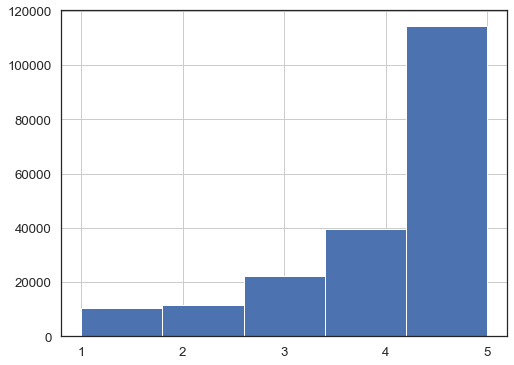

In [8]:
# Distribution of the rating
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
df['overall'].hist(bins=5)
plt.xticks(np.arange(1,6,step=1))
plt.show()

We can see it is not normally distributed but skewed to left

In [10]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1YJEY40YUW4SE,7806397051,Andrea,"[3, 4]",Very oily and creamy. Not at all what I expect...,1.0,Don't waste your money,1391040000,"01 30, 2014"
1,A60XNB876KYML,7806397051,Jessica H.,"[1, 1]",This palette was a decent price and I was look...,3.0,OK Palette!,1397779200,"04 18, 2014"
2,A3G6XNM240RMWA,7806397051,Karen,"[0, 1]",The texture of this concealer pallet is fantas...,4.0,great quality,1378425600,"09 6, 2013"
3,A1PQFP6SAJ6D80,7806397051,Norah,"[2, 2]",I really can't tell what exactly this thing is...,2.0,Do not work on my face,1386460800,"12 8, 2013"
4,A38FVHZTNQ271F,7806397051,Nova Amor,"[0, 0]","It was a little smaller than I expected, but t...",3.0,It's okay.,1382140800,"10 19, 2013"


In [27]:
# remove null helpful



([<matplotlib.axis.XTick at 0x22718266c10>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

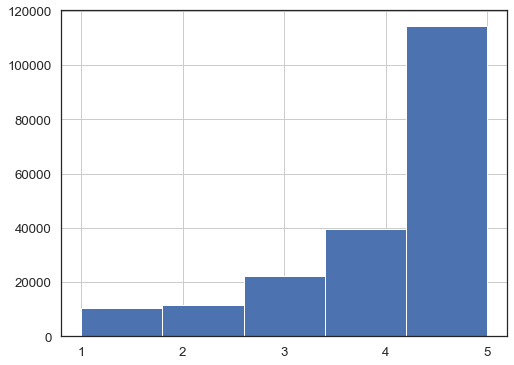

In [46]:
text = [re.sub(r'[^A-Za-z0-9]+',' ', t) for t in [d['reviewText'] for d in dataset]]
for i in range(len(text)):
    text[i] = text[i].lower()

In [64]:
# your code here
tfidf = TfidfVectorizer(sublinear_tf=True,
                        analyzer = "word",
                        max_features=2000,
                        tokenizer=word_tokenize,
                        stop_words=stopwords.words("english"))

In [ ]:
# bigger then 0.5 is useful
# 
threshold = 0.5

In [141]:
Y = [1 if d['helpful'][0]/d['helpful'][1] >= 0.5 else 0 for d in dataset]

In [146]:
X_text_train, Y_train = text[:70000], Y[:70000]
X_text_valid, Y_valid = text[70000:], Y[70000:]
X_train = tfidf.fit_transform(X_text_train)
X_valid = tfidf.transform(X_text_valid)

In [148]:
tfidf_df = pd.DataFrame(data = X_train.todense())

In [149]:
tfidf_df.index = Y_train

In [150]:
tfidf_df.columns = tfidf.get_feature_names()

In [151]:
most_unique = tfidf_df.idxmax(axis = 1)

KeyboardInterrupt: 

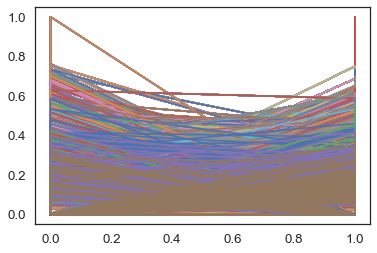

In [155]:
f1, ax = plt.subplots()
ax.plot(tfidf_df[:10000].index, tfidf_df[:10000][most_unique[0]], label = most_unique[0])
ax.plot(tfidf_df[:10000].index, tfidf_df[:10000][most_unique[1]], label = most_unique[1])
ax.plot(tfidf_df[:10000].index, tfidf_df[:10000][most_unique[2]], label = most_unique[2])
ax.plot(tfidf_df[:10000].index, tfidf_df[:10000][most_unique[3]], label = most_unique[3])
plt.xticks(np.arange(0,1, step = 0.1))
plt.ylabel('TF-IDF')

plt.legend()
plt.show()

In [120]:
mod = linear_model.LinearRegression()

In [121]:
mod.fit(X_train, Y_train)

LinearRegression()

In [122]:
Y_pred_valid  = mod.predict(X_valid)

In [124]:
MSE = sum([(a-b)**2 for a,b in zip(Y_pred_valid, Y_valid)]) / len(Y_valid)

In [125]:
MSE

0.1386672330422749

In [139]:
Y_pred_valid[0]

0.629093518227114

In [145]:
dataset[0]

{'reviewerID': 'A1YJEY40YUW4SE',
 'asin': '7806397051',
 'reviewerName': 'Andrea',
 'helpful': [3, 4],
 'reviewText': 'Very oily and creamy. Not at all what I expected... ordered this to try to highlight and contour and it just looked awful!!! Plus, took FOREVER to arrive.',
 'overall': 1.0,
 'summary': "Don't waste your money",
 'unixReviewTime': 1391040000,
 'reviewTime': '01 30, 2014'}

In [140]:
dataset[0]

{'reviewerID': 'A1YJEY40YUW4SE',
 'asin': '7806397051',
 'reviewerName': 'Andrea',
 'helpful': [3, 4],
 'reviewText': 'Very oily and creamy. Not at all what I expected... ordered this to try to highlight and contour and it just looked awful!!! Plus, took FOREVER to arrive.',
 'overall': 1.0,
 'summary': "Don't waste your money",
 'unixReviewTime': 1391040000,
 'reviewTime': '01 30, 2014'}